In [2]:
import pandas as pd
import numpy as np

# SI 618 Final Project: EU Transportation Data

## Data Sources

The first step is to load our data into separate dataframes. We are collecting and analyzing datasets that concern countries in the EU, and key data points that are associated with transportation, such as train ridership, car usage, economic productivity, and spending on transportation infrastructure. The datasets we are pulling, which are from Eurostat and the International Transport Forum, are as follows:
- **GDP per capita in PPS:** Contains EU countries, along with their GDP per capita from 2010 to 2021.
- **Population** on 1 January by sex, country of birth and group of citizenship from 2010 to 2021.
- **Number of passenger cars per 1,000 inhabitants** in each country from 2010 to 2021.
- **Number of passengers transported by railways** in each country from 2010 to 2021.
- **Inland transportation investment** including investment expenditure on railways infrastructure, roads, and waterways from 2000 to 2020. Both road spending and inland transportation investment come from the same data source.

In [3]:
# Load all datasets from csv files into dataframes
gdp = pd.read_csv("datasets/gdp.csv")
population = pd.read_csv("datasets/populations.csv")
passenger_cars = pd.read_csv("datasets/cars_per_1000_inhabitants.csv")
passenger_railways = pd.read_csv("datasets/passengers_transported.csv")
transportation_investment = pd.read_csv("datasets/transportation_spending.csv")

In [53]:
display(gdp.head(), population.head(), passenger_cars.head(), passenger_railways.head(), transportation_investment.head())

,country,year,gdp_per_capita
0,Albania,2010,29
1,Albania,2011,30
2,Albania,2012,30
3,Albania,2013,29
4,Albania,2014,30


,country,year,population
0,Andorra,2011,78115
1,Andorra,2012,78115
2,Andorra,2013,76246
3,Andorra,2016,71732
4,Andorra,2018,74794


,country,year,passenger_cars_per_1000
0,Albania,2013,118
1,Albania,2014,131
2,Albania,2015,140
3,Albania,2016,152
4,Albania,2017,147


,country,year,passengers_transported
414,Austria,2010,239974.0
415,Austria,2011,241526.0
416,Austria,2012,260518.0
417,Austria,2013,271888.0
418,Austria,2014,270913.0


,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


## Data Manipulation

### Column Names

In [4]:
# Drop columns that are not needed from each dataframe
gdp.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'na_item', 'ppp_cat', 'OBS_FLAG'], inplace=True)
population.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'indic_de', 'OBS_FLAG'], inplace=True)
passenger_cars.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG'], inplace=True)
passenger_railways.drop(columns=['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG'], inplace=True)
transportation_investment.drop(columns=['COUNTRY', 'VARIABLE',
                             'MEASURE', 'YEAR', 'Unit Code',
                            'Unit', 'PowerCode Code',
                            'PowerCode', 'Reference Period Code',
                            'Reference Period', 'Flag Codes',
                            'Flags'], inplace=True)

In [5]:
# Rename columns for consistency across all dataframes
gdp.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "gdp_per_capita"}, inplace=True)
population.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "population"}, inplace=True)
passenger_cars.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "passenger_cars_per_1000"}, inplace=True)
passenger_railways.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "passengers_transported"}, inplace=True)
transportation_investment.rename(columns={"Country": "country",
                                           "Year": "year",
                                            "Value": "value",
                                            "Variable": 'variable',
                                            'Measure': 'measure'},
                                            inplace=True)

In [6]:
# Only include the columns where Euro is the determined measure
# And where variable = "Total road spending" OR "Total inland transport infrastructure investment"
transportation_investment = transportation_investment[transportation_investment.measure == 'Euro']
transportation_investment = transportation_investment[transportation_investment.variable.isin(
    ['Total road spending', 'Total inland transport infrastructure investment'])]

### Filter Check

In [7]:
# Value counts to ensure we filtered properly
transportation_investment['measure'].value_counts()

Euro    1748
Name: measure, dtype: int64

In [8]:
# Value counts to ensure we filtered properly
transportation_investment['variable'].value_counts()

Total inland transport infrastructure investment    938
Total road spending                                 810
Name: variable, dtype: int64

### Keep Euros Only

In [9]:
# Drop Euro column because it's useless now that everything is in Euros
transportation_investment.drop(columns=['measure'], inplace=True)

### Dataframes Check

In [10]:
# Preview all dataframes to ensure appropriate names and values are included
passenger_cars.head()

,country,year,passenger_cars_per_1000
0,AL,2013,118
1,AL,2014,131
2,AL,2015,140
3,AL,2016,152
4,AL,2017,147


In [11]:
gdp.head()

,country,year,gdp_per_capita
0,AL,2010,29
1,AL,2011,30
2,AL,2012,30
3,AL,2013,29
4,AL,2014,30


In [12]:
population.head()

,country,year,population
0,AD,2011,78115
1,AD,2012,78115
2,AD,2013,76246
3,AD,2016,71732
4,AD,2018,74794


In [13]:
passenger_railways.head()

,unit,country,year,passengers_transported
0,MIO_PKM,AT,2010,10263.0
1,MIO_PKM,AT,2011,10778.0
2,MIO_PKM,AT,2012,11211.0
3,MIO_PKM,AT,2013,11804.0
4,MIO_PKM,AT,2014,11981.0


### passenger_railways cleaning

In [14]:
# see passenger railways shape before transformation
passenger_railways.shape

(799, 4)

In [15]:
# Filter passenger railways on 'unit' to only include values in 'THS_PAS' = thousand passengers and remove 'unit' column after filtering
passenger_railways = passenger_railways[passenger_railways['unit'] != 'MIO_PKM']
passenger_railways = passenger_railways.drop(columns=['unit'])
passenger_railways

,country,year,passengers_transported
414,AT,2010,239974.0
415,AT,2011,241526.0
416,AT,2012,260518.0
417,AT,2013,271888.0
418,AT,2014,270913.0
...,...,...,...
794,UK,2015,1741562.0
795,UK,2016,1772563.0
796,UK,2017,1757359.0
797,UK,2018,1783232.0


### Country Code Conversion

In [16]:
# Convert country codes into countries

#Dictionary with codes as keys and names as values
country_codes = {
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DE": "Germany",
    "DK": "Denmark",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "FX": "France (metropolitan)",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "LI": "Liechtenstein",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Turkey",
    "AD": "Andorra",
    "BY": "Belarus",
    "BA": "Bosnia",
    "XK": "Kosovo",
    "MD": "Moldova",
    "MC": "Monaco",
    "RU": "Russia",
    "SM": "San Marino",
    "UA": "Ukraine",
    "AM": "Armenia",
    "AZ": "Azerbaijan",
    "GE": "Georgia"
}

Next section: Update country codes to country names

In [17]:
# update country code to country names for each dataframe
for idx, value in passenger_cars['country'].items():
   if value in country_codes:
      passenger_cars.loc[idx, 'country'] = country_codes[value]

In [18]:
passenger_cars.head()

,country,year,passenger_cars_per_1000
0,Albania,2013,118
1,Albania,2014,131
2,Albania,2015,140
3,Albania,2016,152
4,Albania,2017,147


In [19]:
# update country code to country names
for idx, value in passenger_railways['country'].items():
   if value in country_codes:
      passenger_railways.loc[idx, 'country'] = country_codes[value]

In [20]:
passenger_railways.head()

,country,year,passengers_transported
414,Austria,2010,239974.0
415,Austria,2011,241526.0
416,Austria,2012,260518.0
417,Austria,2013,271888.0
418,Austria,2014,270913.0


In [21]:
# Update country code to country names
for idx, value in population['country'].items():
   if value in country_codes:
      population.loc[idx, 'country'] = country_codes[value]

In [22]:
population.head()

,country,year,population
0,Andorra,2011,78115
1,Andorra,2012,78115
2,Andorra,2013,76246
3,Andorra,2016,71732
4,Andorra,2018,74794


In [23]:
# Update country code to country names
for idx, value in gdp['country'].items():
   if value in country_codes:
      gdp.loc[idx, 'country'] = country_codes[value]

In [24]:
gdp.head()

,country,year,gdp_per_capita
0,Albania,2010,29
1,Albania,2011,30
2,Albania,2012,30
3,Albania,2013,29
4,Albania,2014,30


### transportation_investment Cleaning

In [25]:
# Here the transportation_investment df includes both inland transportation and road spending
transportation_investment.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In order to successfully join all tables, we first need to split the transportation investment table into two: one for road spending, and one for inland transport investment.

In [26]:
# Make a copy of transportation_investment for road spending
road_spending = transportation_investment.copy()
road_spending.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In [27]:
# Drop inland transport investment values
road_spending= road_spending[road_spending['variable'] != 'Total inland transport infrastructure investment']
road_spending

,country,variable,year,value
147,Albania,Total road spending,2000,1.121858e+08
148,Albania,Total road spending,2001,1.132736e+08
149,Albania,Total road spending,2002,7.128244e+07
150,Albania,Total road spending,2003,6.654982e+07
151,Albania,Total road spending,2004,9.790776e+07
...,...,...,...,...
10803,United States,Total road spending,2012,9.861154e+10
10804,United States,Total road spending,2013,9.549390e+10
10805,United States,Total road spending,2014,9.801550e+10
10806,United States,Total road spending,2015,1.199390e+11


In [28]:
# Drop the 'variable' column because it's no longer needed; rename 'value' column to 'total_road_spending'
road_spending = road_spending.drop(columns=['variable'])
road_spending.rename(columns={'value': 'total_road_spending'}, inplace=True)
road_spending

,country,year,total_road_spending
147,Albania,2000,1.121858e+08
148,Albania,2001,1.132736e+08
149,Albania,2002,7.128244e+07
150,Albania,2003,6.654982e+07
151,Albania,2004,9.790776e+07
...,...,...,...
10803,United States,2012,9.861154e+10
10804,United States,2013,9.549390e+10
10805,United States,2014,9.801550e+10
10806,United States,2015,1.199390e+11


In [29]:
# Make a copy of transportation_investment for inland transport investment
inland_transport_investment = transportation_investment.copy()
inland_transport_investment.head()

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07


In [30]:
# Drop total road spending values
inland_transport_investment = inland_transport_investment[inland_transport_investment['variable'] != 'Total road spending']
inland_transport_investment

,country,variable,year,value
84,Albania,Total inland transport infrastructure investment,2000,1.104212e+08
85,Albania,Total inland transport infrastructure investment,2001,1.090002e+08
86,Albania,Total inland transport infrastructure investment,2002,7.009591e+07
87,Albania,Total inland transport infrastructure investment,2003,6.152459e+07
88,Albania,Total inland transport infrastructure investment,2004,9.316940e+07
...,...,...,...,...
10730,United States,Total inland transport infrastructure investment,2015,9.614906e+10
10731,United States,Total inland transport infrastructure investment,2016,9.625700e+10
10732,United States,Total inland transport infrastructure investment,2017,9.586912e+10
10733,United States,Total inland transport infrastructure investment,2018,9.548201e+10


In [31]:
# Drop 'variable' column because it's no longer needed; rename 'value' column to 'total_inland_transport_investment'
inland_transport_investment = inland_transport_investment.drop(columns=['variable'])
inland_transport_investment.rename(columns={'value': 'total_inland_transport_investment'}, inplace=True)
inland_transport_investment

,country,year,total_inland_transport_investment
84,Albania,2000,1.104212e+08
85,Albania,2001,1.090002e+08
86,Albania,2002,7.009591e+07
87,Albania,2003,6.152459e+07
88,Albania,2004,9.316940e+07
...,...,...,...
10730,United States,2015,9.614906e+10
10731,United States,2016,9.625700e+10
10732,United States,2017,9.586912e+10
10733,United States,2018,9.548201e+10


### Merge

Join all 6 tables.

In [32]:
merged_df1 = passenger_cars.merge(passenger_railways, on=['country', 'year'], how='left')
merged_df1

,country,year,passenger_cars_per_1000,passengers_transported
0,Albania,2013,118,NaN
1,Albania,2014,131,NaN
2,Albania,2015,140,NaN
3,Albania,2016,152,NaN
4,Albania,2017,147,NaN
...,...,...,...,...
355,United Kingdom,2017,471,1757359.0
356,United Kingdom,2018,473,1783232.0
357,Kosovo,2017,94,NaN
358,Kosovo,2018,143,NaN


In [33]:
merged_df2 = merged_df1.merge(gdp, on=['country', 'year'], how='left')
merged_df2

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita
0,Albania,2013,118,NaN,29.0
1,Albania,2014,131,NaN,30.0
2,Albania,2015,140,NaN,30.0
3,Albania,2016,152,NaN,30.0
4,Albania,2017,147,NaN,30.0
...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0
356,United Kingdom,2018,473,1783232.0,105.0
357,Kosovo,2017,94,NaN,NaN
358,Kosovo,2018,143,NaN,NaN


In [34]:
merged_df3 = merged_df2.merge(population, on=['country', 'year'], how='left')
merged_df3

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population
0,Albania,2013,118,NaN,29.0,2897770
1,Albania,2014,131,NaN,30.0,2892394
2,Albania,2015,140,NaN,30.0,2885796
3,Albania,2016,152,NaN,30.0,2875592
4,Albania,2017,147,NaN,30.0,2876591
...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142
356,United Kingdom,2018,473,1783232.0,105.0,66273576
357,Kosovo,2017,94,NaN,NaN,1783531
358,Kosovo,2018,143,NaN,NaN,1798506


In [35]:
merged_df4 = merged_df3.merge(road_spending, on=['country', 'year'], how='left')
merged_df4

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending
0,Albania,2013,118,NaN,29.0,2897770,2.429094e+08
1,Albania,2014,131,NaN,30.0,2892394,2.079811e+08
2,Albania,2015,140,NaN,30.0,2885796,1.876107e+08
3,Albania,2016,152,NaN,30.0,2875592,1.021451e+08
4,Albania,2017,147,NaN,30.0,2876591,1.726266e+08
...,...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142,1.110119e+10
356,United Kingdom,2018,473,1783232.0,105.0,66273576,1.100430e+10
357,Kosovo,2017,94,NaN,NaN,1783531,NaN
358,Kosovo,2018,143,NaN,NaN,1798506,NaN


In [36]:
merged_df5 = merged_df4.merge(inland_transport_investment, on=['country', 'year'], how='left')
merged_df5

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
0,Albania,2013,118,NaN,29.0,2897770,2.429094e+08,2.348552e+08
1,Albania,2014,131,NaN,30.0,2892394,2.079811e+08,1.934331e+08
2,Albania,2015,140,NaN,30.0,2885796,1.876107e+08,1.798056e+08
3,Albania,2016,152,NaN,30.0,2875592,1.021451e+08,8.914034e+07
4,Albania,2017,147,NaN,30.0,2876591,1.726266e+08,1.590396e+08
...,...,...,...,...,...,...,...,...
355,United Kingdom,2017,471,1757359.0,107.0,65844142,1.110119e+10,2.224614e+10
356,United Kingdom,2018,473,1783232.0,105.0,66273576,1.100430e+10,2.221615e+10
357,Kosovo,2017,94,NaN,NaN,1783531,NaN,NaN
358,Kosovo,2018,143,NaN,NaN,1798506,NaN,NaN


In [37]:
# review unique country values to check all codes were transformed to a name
merged_df5['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Switzerland',
       'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'EU27_2020', 'Finland', 'France', 'Croatia', 'Hungary',
       'Ireland', 'Iceland', 'Italy', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'Montenegro', 'North Macedonia', 'Malta',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia',
       'Sweden', 'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom',
       'Kosovo'], dtype=object)

In [38]:
# remove extraneous country names that did not have a match: 'EU27_2020'; print unique country values to ensure value was removed
merged_df5 = merged_df5[merged_df5['country'] != 'EU27_2020']
merged_df5['country'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Switzerland',
       'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece',
       'Spain', 'Finland', 'France', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Italy', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Latvia', 'Montenegro', 'North Macedonia', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden',
       'Slovenia', 'Slovakia', 'Turkey', 'United Kingdom', 'Kosovo'],
      dtype=object)

### Drop null Values

In [39]:
# Check number of null values
merged_df5.isna().sum()

country                                0
year                                   0
passenger_cars_per_1000                0
passengers_transported                70
gdp_per_capita                        13
population                             0
total_road_spending                  160
total_inland_transport_investment    130
dtype: int64

In [40]:
# Drop null values
country_data = merged_df5.dropna()

In [41]:
country_data.shape

(150, 8)

In [42]:
country_data.head(20)

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09
14,Austria,2017,555,288503.0,127.0,8772865,1.202000e+09,2.070000e+09
15,Austria,2018,562,307647.0,127.0,8822267,1.189000e+09,2.148000e+09
16,Austria,2019,566,314892.0,126.0,8858775,1.314000e+09,2.303500e+09
17,Austria,2020,570,191272.0,125.0,8901064,1.339000e+09,2.553700e+09
29,Bulgaria,2012,385,26508.0,47.0,7327224,6.974128e+08,6.999693e+08


### Create .csv

In [43]:
# Saved to csv file to import into other notebooks
country_data.to_csv("datasets/country_data.csv")

## EDA

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

### Shape, Columns, Data Types, and Categorical Variables

In [46]:
country_data.shape

(150, 8)

In [47]:
country_data.dtypes

country                               object
year                                   int64
passenger_cars_per_1000                int64
passengers_transported               float64
gdp_per_capita                       float64
population                             int64
total_road_spending                  float64
total_inland_transport_investment    float64
dtype: object

In [44]:
country_data.columns

Index(['country', 'year', 'passenger_cars_per_1000', 'passengers_transported',
       'gdp_per_capita', 'population', 'total_road_spending',
       'total_inland_transport_investment'],
      dtype='object')

In [48]:
# Show all the countries that are in our dataset
country_data['country'].unique()

array(['Austria', 'Bulgaria', 'Switzerland', 'Denmark', 'Estonia',
       'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Italy',
       'Lithuania', 'Luxembourg', 'Latvia', 'Norway', 'Poland',
       'Portugal', 'Sweden', 'Slovenia', 'United Kingdom'], dtype=object)

In [45]:
country_data['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

### Numerical EDA

In [50]:
country_data.head()

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09


In [71]:
# describe

In [69]:
display(country_data.head())

,country,year,passenger_cars_per_1000,passengers_transported,gdp_per_capita,population,total_road_spending,total_inland_transport_investment
9,Austria,2012,542,260518.0,133.0,8408121,8.440000e+08,2.018000e+09
10,Austria,2013,546,271888.0,133.0,8451860,9.220000e+08,2.022000e+09
11,Austria,2014,547,270913.0,132.0,8507786,1.120000e+09,2.030000e+09
12,Austria,2015,546,280060.0,131.0,8584926,1.147000e+09,2.006000e+09
13,Austria,2016,550,286990.0,130.0,8700471,1.141000e+09,1.969000e+09


### Visual EDA

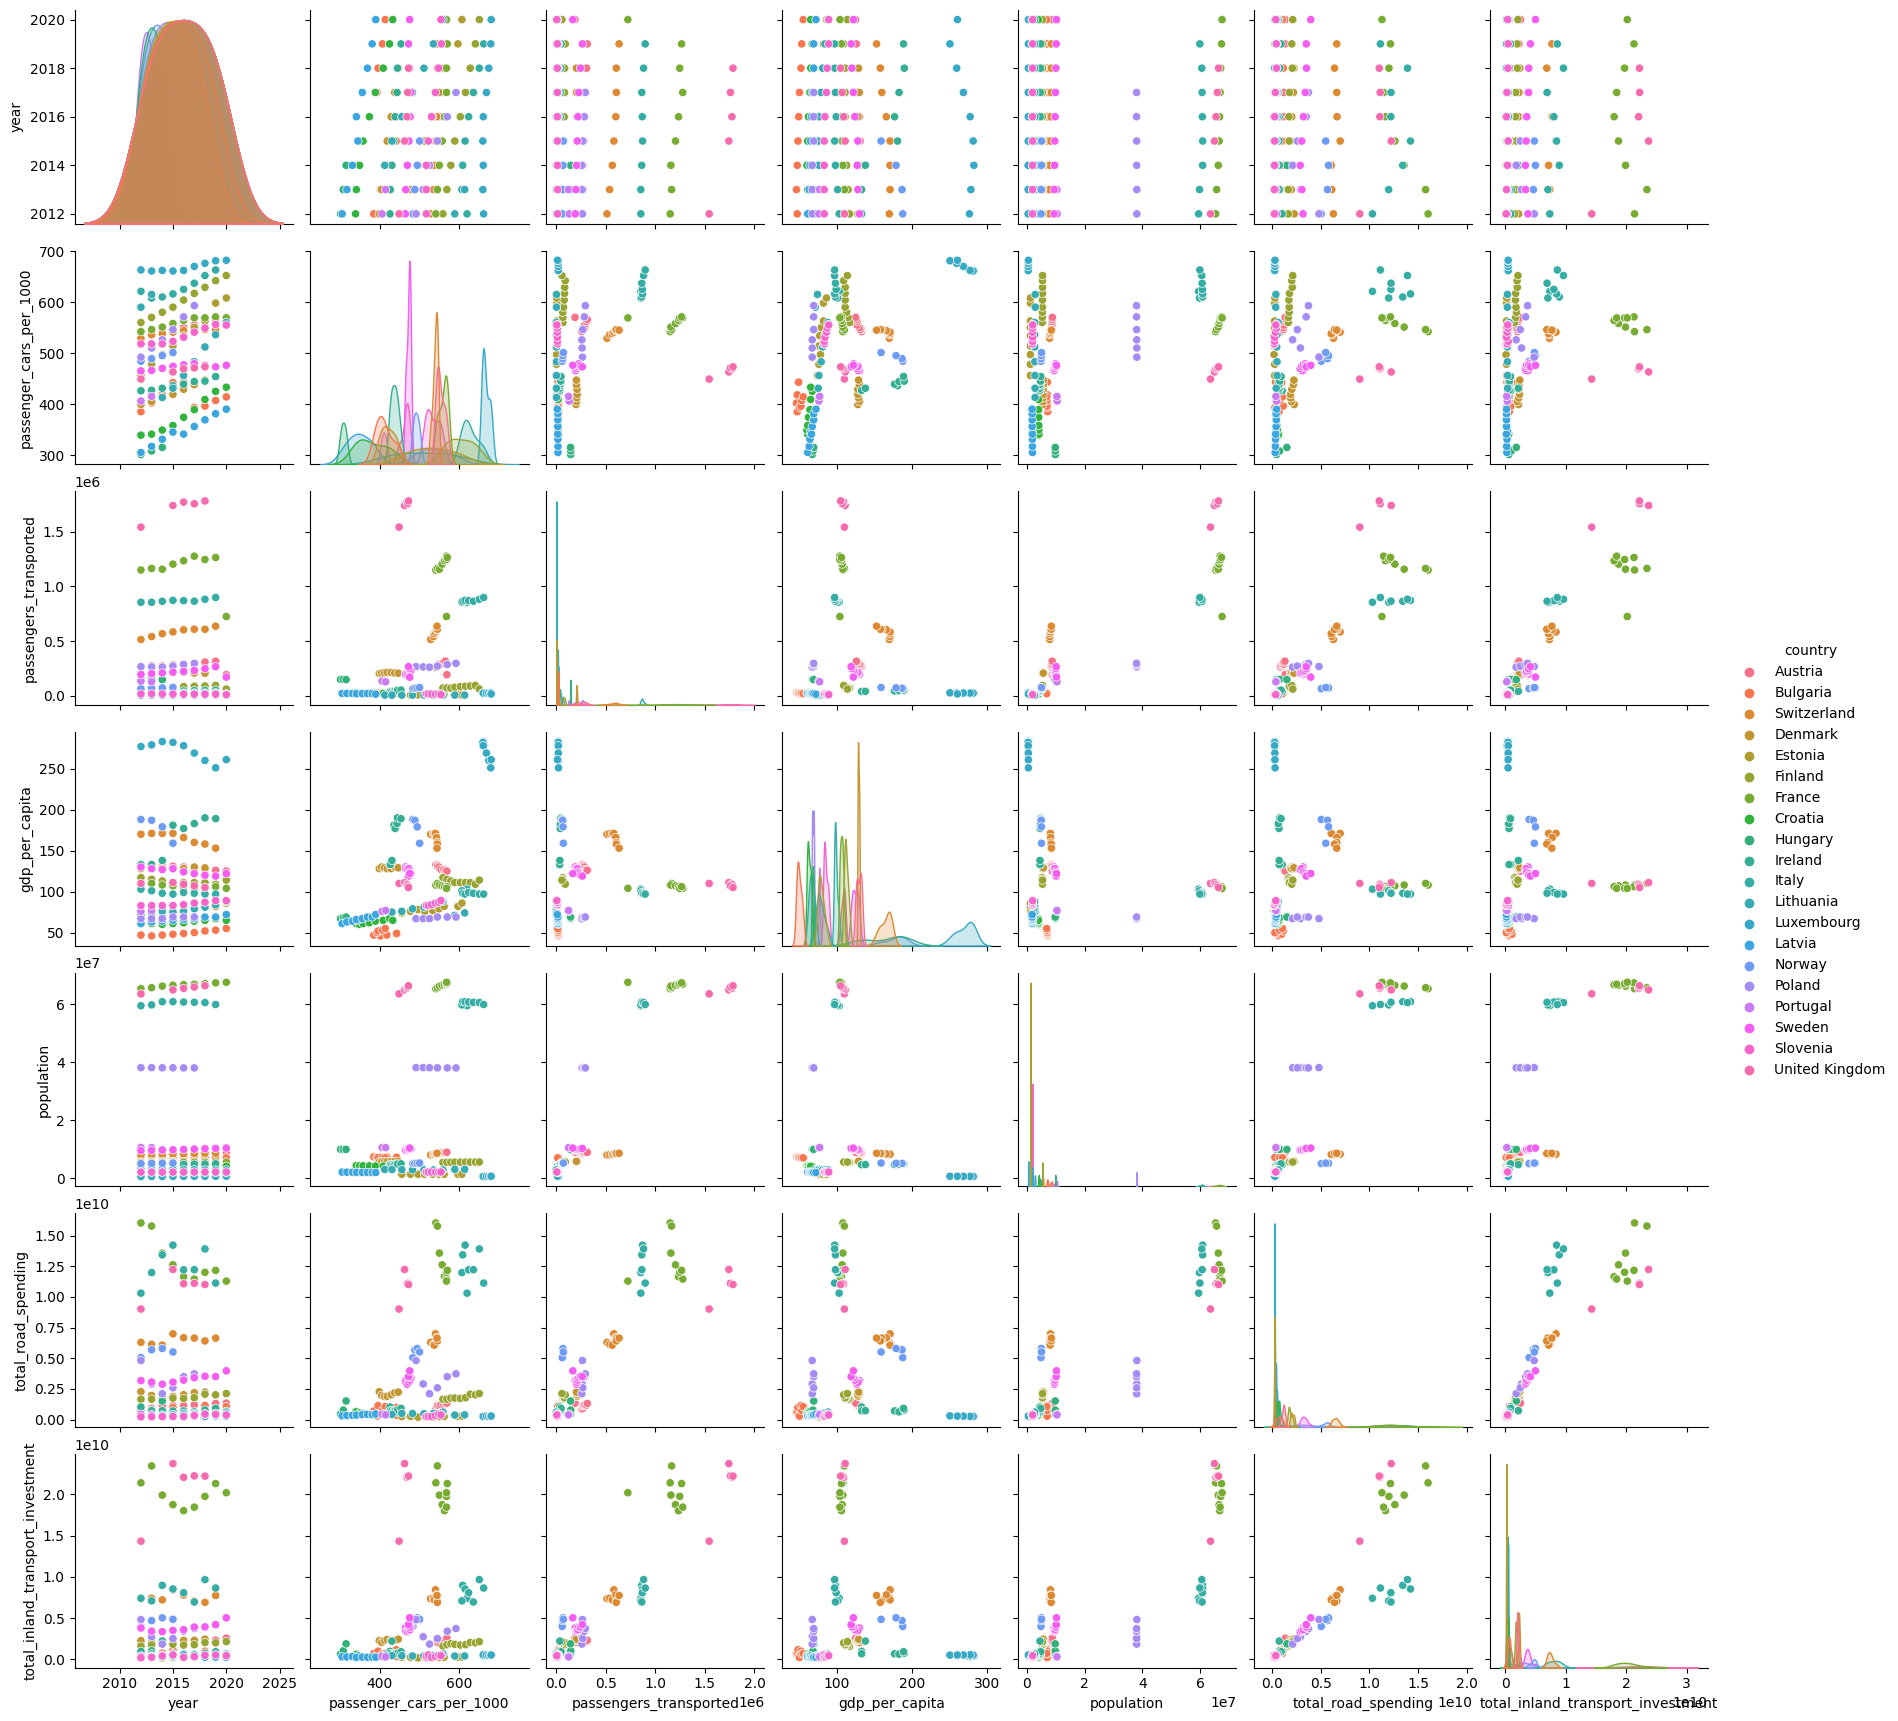

In [58]:
sns.pairplot(country_data, hue='country')

### EDA Write Up

- Shape:
    - 150 rows and 8 columns.
- Columns:
    - 'country':
        - 20 EU countries.
        - object
        - found in all 5 data sources.
    - 'year':
        - one of the 9 years that the data is for (2012 - 2020).
        - int64
        - found in all 5 data sources.
    - 'passenger_cars_per_1000':
        - number of passenger cars per 1000 population per year.
        - int64
        - found in 1 data source (cars_per_1000_inhabitants.csv)
    - 'passengers_transported':
        - number of railway passengers transported per year.
        - float64
        - found in 1 data source (passengers_transported.csv)
    - 'gdp_per_capita':
        - gdp per capita for that year.
        - float64
        - found in 1 data source (gdp.csv)
    - 'population':
        - population of a country per year.
        - int64
        - found in 1 data source (populations.csv)
    - 'total_road_spending':
        - __? FILL THIS IN__
        - float64
        - found in 1 data source (transportation_spending.csv)
    - 'total_inland_transport_investment':
        - __? FILL THIS IN__
        - float64
        - found in 1 data source (transportation_spending.csv)
- EU Countries:
    - 'Austria'
    - 'Bulgaria'
    - 'Switzerland'
    - 'Denmark'
    - 'Estonia',
    - 'Finland'
    - 'France'
    - 'Croatia'
    - 'Hungary'
    - 'Ireland'
    - 'Italy'
    - 'Lithuania'
    - 'Luxembourg'
    - 'Latvia'
    - 'Norway'
    - 'Poland'
    - 'Portugal'
    - 'Sweden'
    - 'Slovenia'
    - 'United Kingdom'

## Analysis: Clustering